#**Top 100 Companies**

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [163]:
df = pd.read_csv('/content/Companies.csv')

In [164]:
df.head()

,Unnamed: 0,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,1,2,Amazon,Retail and Cloud Computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,2,3,Exxon Mobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"


**Data Cleaning**

In [165]:
df = df.drop(columns=['Unnamed: 0'])

In [166]:
df.isnull().sum()

Rank                      0
Name                      0
Industry                  0
Revenue (USD millions)    0
Revenue growth            0
Employees                 0
Headquarters              0
dtype: int64

In [167]:
df.dtypes

Rank                       int64
Name                      object
Industry                  object
Revenue (USD millions)    object
Revenue growth            object
Employees                 object
Headquarters              object
dtype: object

In [168]:
df.columns = df.columns.str.replace(' ', '_')

In [169]:
df['Revenue_(USD_millions)'] = df['Revenue_(USD_millions)'].str.replace(',', '').astype(int)

In [170]:
df['Revenue_growth'] = df['Revenue_growth'].str.replace('%', '').astype(float)

In [171]:
df['Employees'] = df['Employees'].str.replace(',', '').astype(float)

In [172]:
df[['City', 'State']] = df['Headquarters'].str.split(', ', 1, expand=True)

<ipython-input-172-51de67bbe9a4>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['City', 'State']] = df['Headquarters'].str.split(', ', 1, expand=True)


In [173]:
df = df.drop(columns=['Headquarters'])

In [174]:
# Updated Data after Data Cleaning
df.head()

,Rank,Name,Industry,Revenue_(USD_millions),Revenue_growth,Employees,City,State
0,1,Walmart,Retail,611289,6.7,2100000.0,Bentonville,Arkansas
1,2,Amazon,Retail and Cloud Computing,513983,9.4,1540000.0,Seattle,Washington
2,3,Exxon Mobil,Petroleum industry,413680,44.8,62000.0,Spring,Texas
3,4,Apple,Electronics industry,394328,7.8,164000.0,Cupertino,California
4,5,UnitedHealth Group,Healthcare,324162,12.7,400000.0,Minnetonka,Minnesota


# **Exploratory Data Analysis**

In [175]:
sns.set_palette("crest")
sns.set_style("whitegrid")

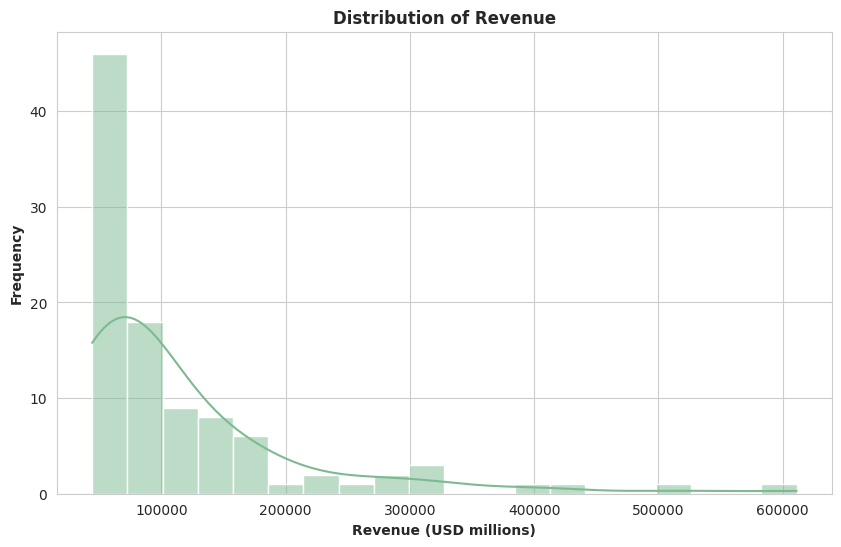

In [176]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Revenue_(USD_millions)'], bins=20, kde=True)
plt.title('Distribution of Revenue', fontweight='bold')
plt.xlabel('Revenue (USD millions)', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.show()

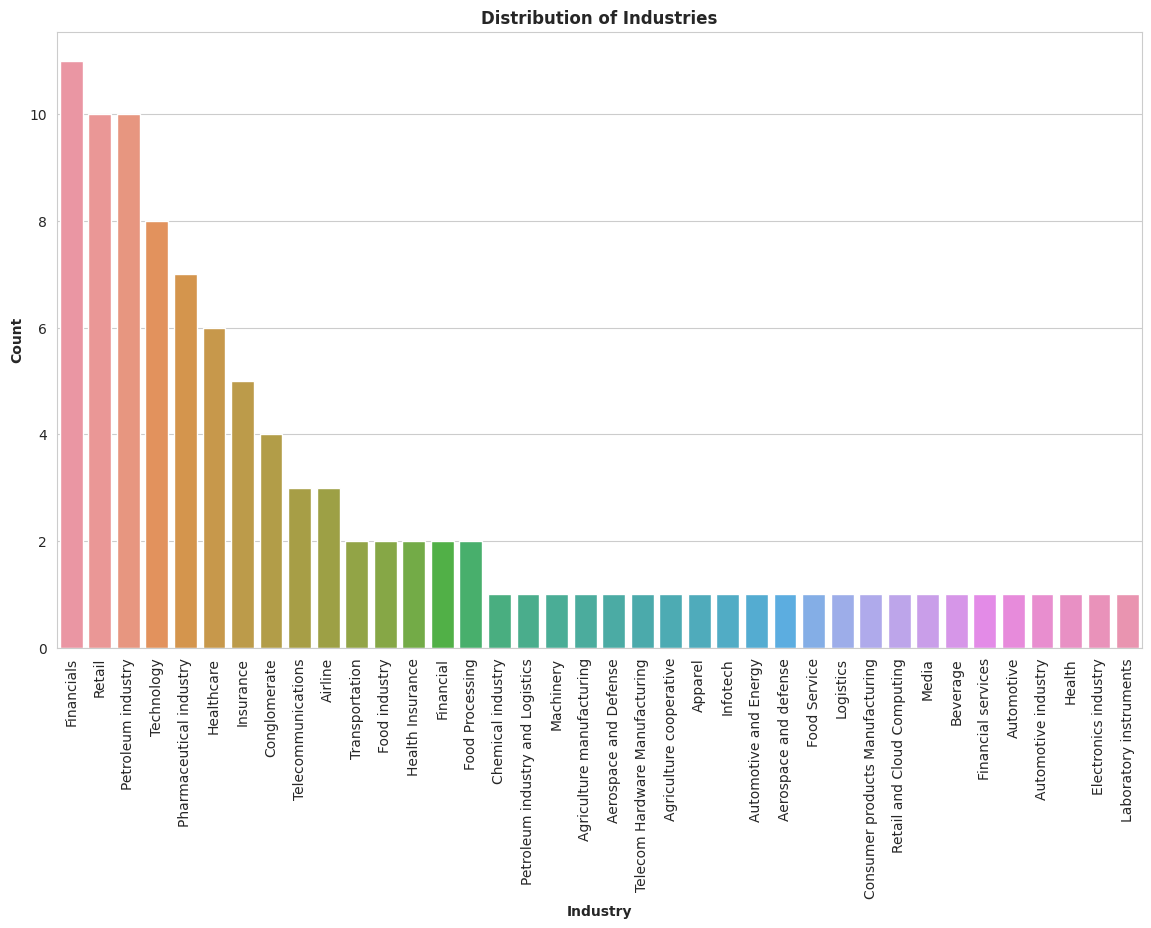

In [177]:
plt.figure(figsize=(14, 8))
industry_counts = df['Industry'].value_counts()
sns.barplot(x=industry_counts.index, y=industry_counts.values)
plt.title('Distribution of Industries', fontweight='bold')
plt.xlabel('Industry', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xticks(rotation=90)
plt.show()

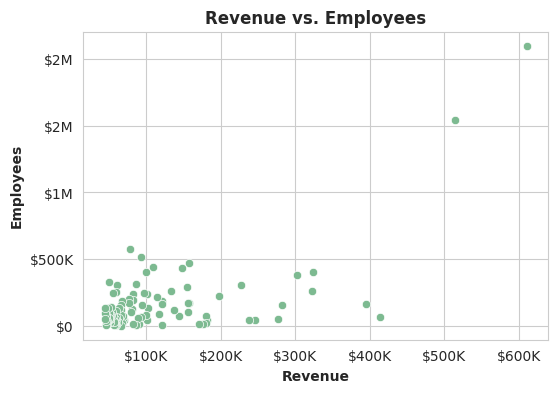

In [178]:
import matplotlib.ticker as mtick

def format_labels(value, pos):
    if value >= 1e6:
        return f"${value/1e6:.0f}M"
    elif value >= 1e3:
        return f"${value/1e3:.0f}K"
    else:
        return f"${value:.0f}"

plt.figure(figsize=(6, 4))
ax = sns.scatterplot(x='Revenue_(USD_millions)', y='Employees', data=df)
plt.title('Revenue vs. Employees', fontweight='bold')
plt.xlabel('Revenue', fontweight='bold')
plt.ylabel('Employees', fontweight='bold')

ax.xaxis.set_major_formatter(mtick.FuncFormatter(format_labels))
ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_labels))

plt.show()

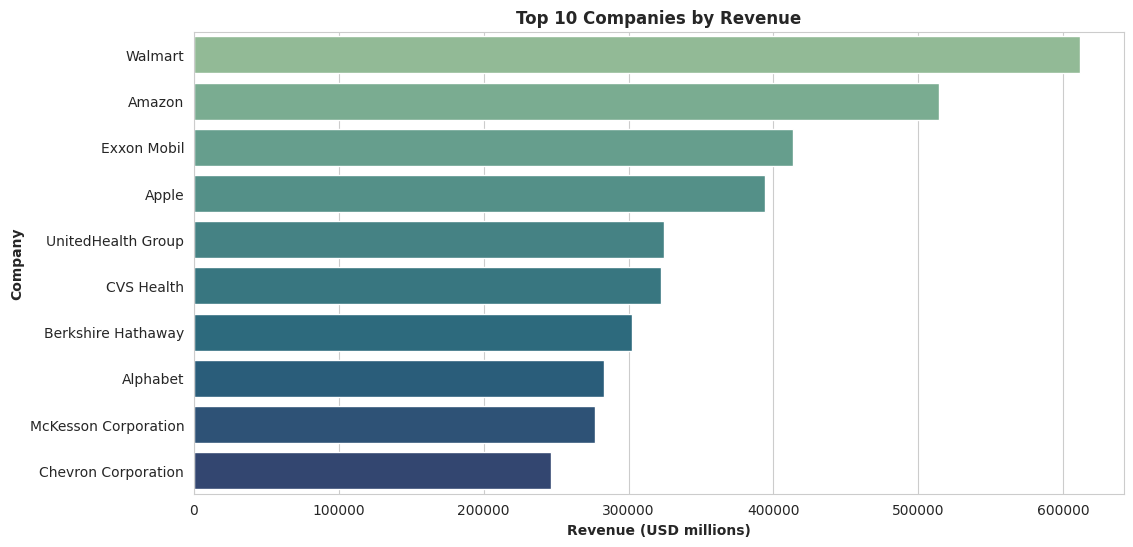

In [179]:
top_10_revenue = df.nlargest(10, 'Revenue_(USD_millions)')
plt.figure(figsize=(12, 6))
sns.barplot(x='Revenue_(USD_millions)', y='Name', data=top_10_revenue, palette='crest')
plt.title('Top 10 Companies by Revenue', fontweight='bold')
plt.xlabel('Revenue (USD millions)', fontweight='bold')
plt.ylabel('Company', fontweight='bold')
plt.show()

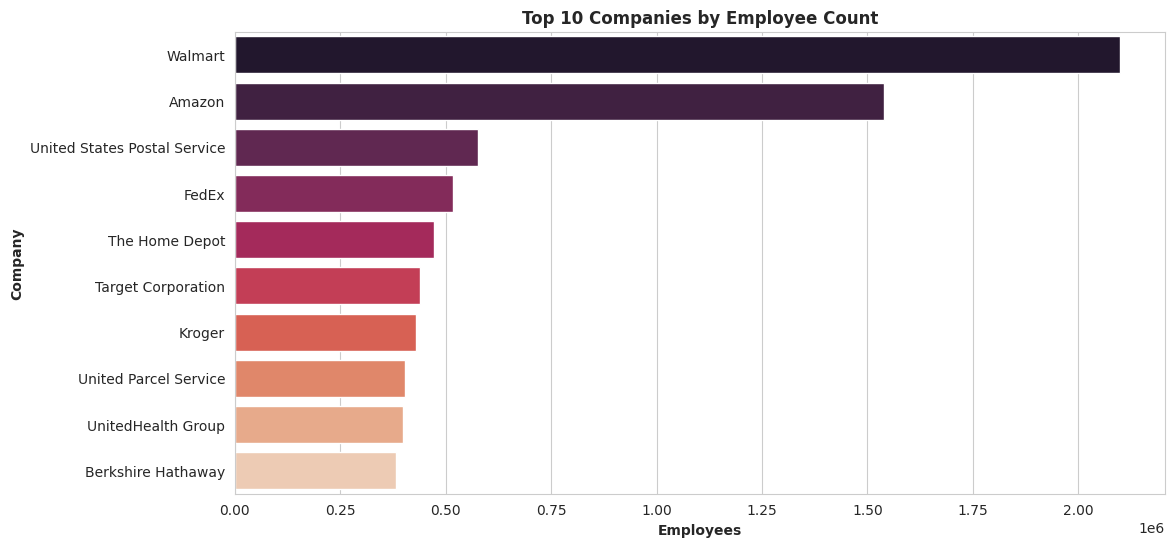

In [180]:
top_10_employees = df.nlargest(10, 'Employees')
plt.figure(figsize=(12, 6))
sns.barplot(x='Employees', y='Name', data=top_10_employees, palette='rocket')
plt.title('Top 10 Companies by Employee Count', fontweight='bold')
plt.xlabel('Employees', fontweight='bold')
plt.ylabel('Company', fontweight='bold')
plt.show()

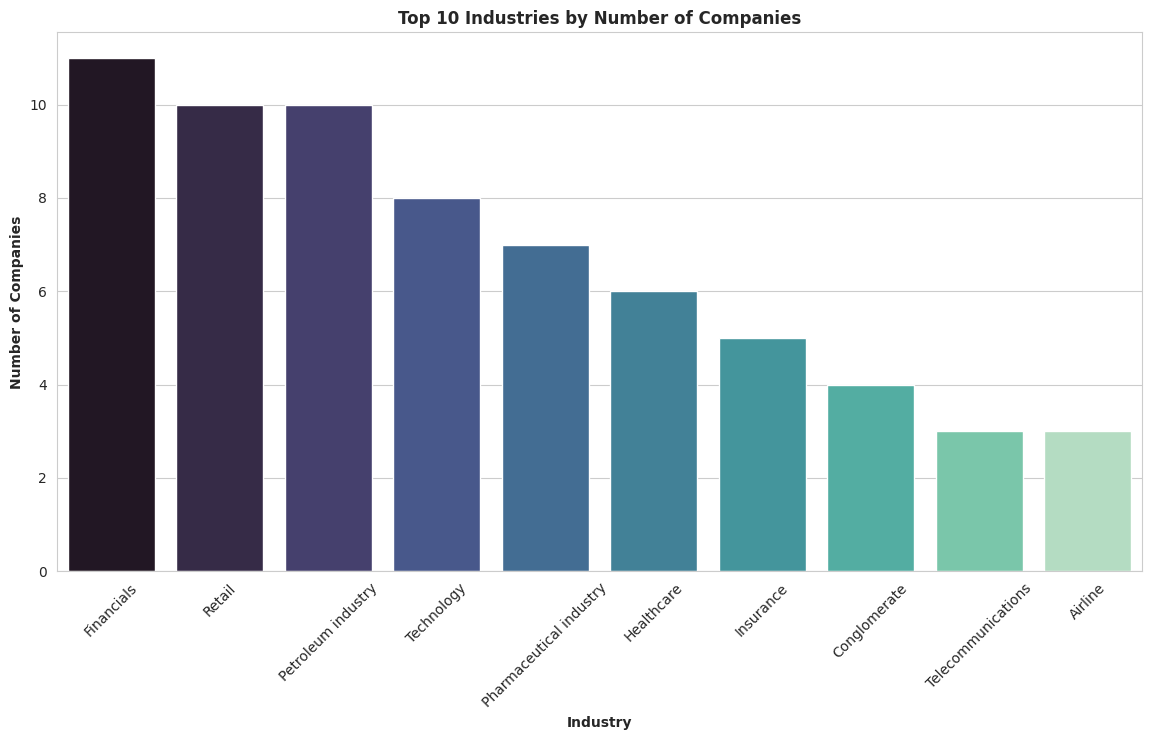

In [181]:
top_10_industries = df['Industry'].value_counts().head(10)

plt.figure(figsize=(14, 7))
sns.barplot(x=top_10_industries.index, y=top_10_industries.values, palette='mako')
plt.title('Top 10 Industries by Number of Companies', fontweight='bold')
plt.xlabel('Industry', fontweight='bold')
plt.ylabel('Number of Companies', fontweight='bold')
plt.xticks(rotation=45)
plt.show()


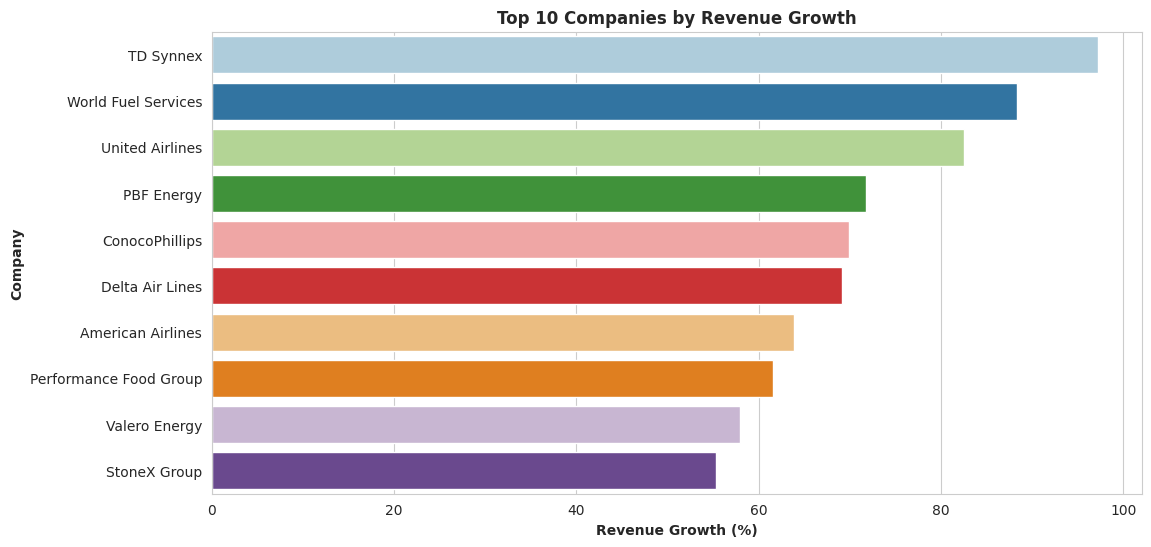

In [182]:
top_10_growth = df.nlargest(10, 'Revenue_growth')

plt.figure(figsize=(12, 6))
sns.barplot(x='Revenue_growth', y='Name', data=top_10_growth, palette='Paired')
plt.title('Top 10 Companies by Revenue Growth', fontweight='bold')
plt.xlabel('Revenue Growth (%)', fontweight='bold')
plt.ylabel('Company', fontweight='bold')
plt.show()

# **Hypothesis Tests - 1**

**Hypothesis Test 1 - ANOVA (Analysis of Variance):**

We want to determine if there is a significant difference in the revenue among different industries.

**Null Hypothesis (H0):** There is no significant difference in revenue among the industries.

**Alternative Hypothesis (H1):** There is a significant difference in revenue among the industries.



In [183]:
import scipy.stats as stats

In [184]:
industry_data = df

In [185]:
industry_groups = []
for industry, group in industry_data.groupby('Industry'):
    industry_groups.append(group['Revenue_(USD_millions)'].values)

In [186]:
f_statistic, p_value = stats.f_oneway(*industry_groups)

In [187]:
print(f"F-statistic: {f_statistic:}")
print(f"P-value: {p_value:}")

F-statistic: 1.37695826581338
P-value: 0.13126031971716845


In [188]:
alpha = 0.05

In [189]:
if p_value < alpha:
    print("There is a significant difference in revenue among the industries.")
else:
    print("There is no significant difference in revenue among the industries.")

There is no significant difference in revenue among the industries.


This suggests that, based on the available data, there is no statistical evidence to support the idea that the average revenue significantly varies between different industries. The differences observed in revenue could be due to random chance or other factors not considered in this analysis

# **Decision Tree Classifier**

In [202]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [195]:
revenue_threshold = 400000
df['High_Revenue'] = (df['Revenue_(USD_millions)'] >= revenue_threshold).astype(int)
X = df.drop(['Name', 'Industry', 'Revenue_(USD_millions)', 'High_Revenue', 'City', 'State'], axis=1)
y = df['High_Revenue']

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [197]:
clf = DecisionTreeClassifier(random_state=42)

In [198]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [199]:
y_pred = clf.predict(X_test)

In [200]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [201]:
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(confusion)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 1.0

Confusion Matrix:
[[19  0]
 [ 0  1]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00         1

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



The classification model performed exceptionally well on the provided dataset, achieving a perfect accuracy of 1.0. It correctly classified all instances into high-revenue (class 0) and low-revenue (class 1) categories, as evidenced by the precision, recall, and F1-score values of 1.00 for both classes.

However, it's important to note that the dataset used for this evaluation is small and may not be representative of real-world scenarios. Therefore, while the model achieved perfect accuracy on this specific dataset